<a href="https://colab.research.google.com/github/Jeri-n/HR_Analytics/blob/main/HR_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Loading Libraries

In [ ]:
#Import the required libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading the dataset
df=pd.read_csv("/content/drive/MyDrive/Luminar_Projects/HR_Analytics/train.csv")
df.head(2)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0


## Basic EDA

In [ ]:
#Checking the unique values in target variable
df["is_promoted"].unique()

array([0, 1])

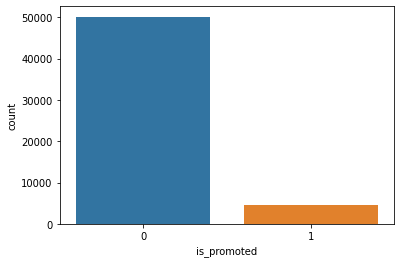

In [ ]:
#Plotting the target variable
sns.countplot(x="is_promoted",data=df)
plt.show()

In [ ]:
#checking the value counts
df["is_promoted"].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [ ]:
#Shape of the dataset
df.shape

(54808, 14)

In [ ]:
#Dataframe Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [ ]:
#Checking the null values
df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [ ]:
#Describe the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.00,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.00,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


In [ ]:
#Correlation on dataset
df.corr()["is_promoted"]

employee_id             0.001206
no_of_trainings        -0.024896
age                    -0.017166
previous_year_rating    0.159320
length_of_service      -0.010670
KPIs_met >80%           0.221582
awards_won?             0.195871
avg_training_score      0.181147
is_promoted             1.000000
Name: is_promoted, dtype: float64

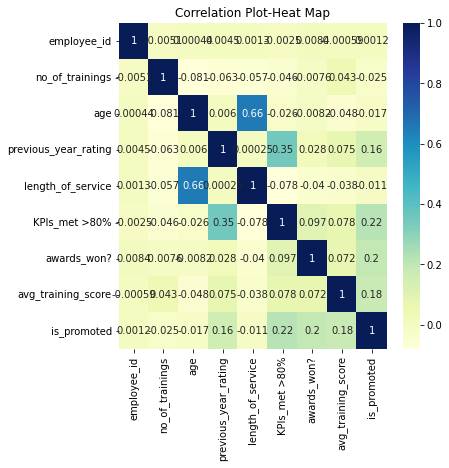

In [ ]:
#Correlation using heatmap

plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.title("Correlation Plot-Heat Map")
plt.show()

In [ ]:
#Pairplot usingn sns
# sns.pairplot(df,hue="is_promoted")
# plt.show()

##Missing Value Treatment

In [ ]:
def impute_nan(data,column,median):
    data[column+"_random"]=data[column]
    random_sample = data[column].dropna().sample(data[column].isnull().sum(),random_state=0)
    random_sample.index=data[data[column].isnull()].index
    data.loc[data[column].isnull(),column+'_random']=random_sample
    data[column]=data[column+"_random"]
    data.drop([column+"_random"],axis=1,inplace=True)

In [ ]:
impute_nan(df,column=("previous_year_rating"),median=0)
print(df.isna().sum())

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64


In [ ]:
df["education"].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [ ]:
df["education"].fillna(df["education"].mode()[0],inplace=True)
print(df.isna().sum())

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64


##Outlier Treatment

The employee_id is int64


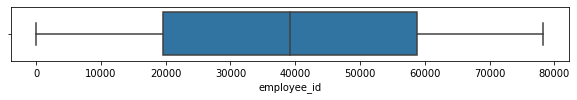

department is an object


<Figure size 720x72 with 0 Axes>

region is an object


<Figure size 720x72 with 0 Axes>

education is an object


<Figure size 720x72 with 0 Axes>

gender is an object


<Figure size 720x72 with 0 Axes>

recruitment_channel is an object


<Figure size 720x72 with 0 Axes>

The no_of_trainings is int64


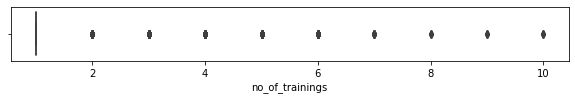

The age is int64


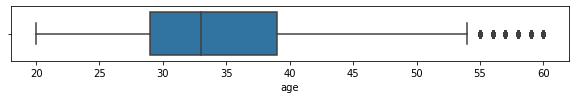

The previous_year_rating is float64


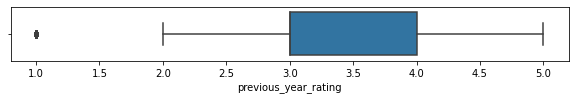

The length_of_service is int64


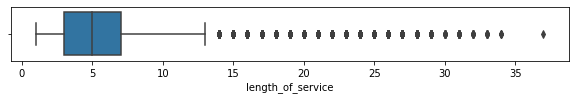

The KPIs_met >80% is int64


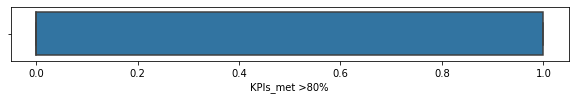

The awards_won? is int64


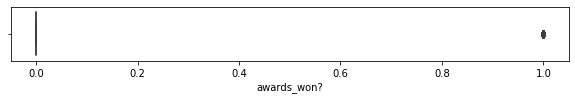

The avg_training_score is int64


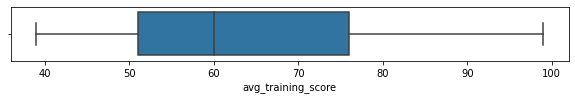

The is_promoted is int64


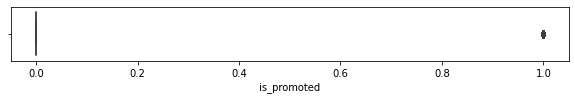

None


In [ ]:
def boxplots(data):
    for feature in data.columns:
        plt.figure(figsize=(10,1))
        if data[feature].dtype !='object':
            sns.boxplot(data[feature],data=data)
            print("The",feature,"is",data[feature].dtype)
            plt.show()
        else:
            print(feature,'is an object')
            plt.show()
print(boxplots(df))

In [ ]:
numericalCol=df.select_dtypes(include=np.number).columns
print("The numerical columns are:",numericalCol)

The numerical columns are: Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')


In [ ]:
objectCol=df.select_dtypes(include=np.object_).columns
print("The object columns are:",objectCol)

The object columns are: Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')


In [ ]:
objectCol

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [ ]:
discretecol=[]
continuecol=[]

for i in numericalCol:
    if df[i].nunique()>20:
        discretecol.append(i)
    else:
        continuecol.append(i)

In [ ]:
print("The discrete columns are:",discretecol)
print()
print("The continuous columns are:",continuecol)

The discrete columns are: ['employee_id', 'age', 'length_of_service', 'avg_training_score']

The continuous columns are: ['no_of_trainings', 'previous_year_rating', 'KPIs_met >80%', 'awards_won?', 'is_promoted']


In [ ]:
for column in continuecol:
    upperlimit=df[column].mean()+3*df[column].std()
    lowerlimit=df[column].mean()-3*df[column].std()
    df.loc[(df[column]>upperlimit),column]=upperlimit
    df.loc[(df[column]<lowerlimit),column]=lowerlimit

print(df[(df[column]<=upperlimit) & (df[column]>=lowerlimit)])

       employee_id         department     region         education gender  \
0            65438  Sales & Marketing   region_7  Master's & above      f   
1            65141         Operations  region_22        Bachelor's      m   
2             7513  Sales & Marketing  region_19        Bachelor's      m   
3             2542  Sales & Marketing  region_23        Bachelor's      m   
4            48945         Technology  region_26        Bachelor's      m   
...            ...                ...        ...               ...    ...   
54803         3030         Technology  region_14        Bachelor's      m   
54804        74592         Operations  region_27  Master's & above      f   
54805        13918          Analytics   region_1        Bachelor's      m   
54806        13614  Sales & Marketing   region_9        Bachelor's      m   
54807        51526                 HR  region_22        Bachelor's      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
0 

##Label Encoder

In [ ]:
new_Df=df[objectCol]
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from collections import defaultdict
defaultEncoder=defaultdict(LabelEncoder)
fitObjectDf=new_Df.apply(lambda x: defaultEncoder[x.name].fit_transform(x))
print(fitObjectDf)

import joblib
joblib.dump(le,"/content/drive/MyDrive/Luminar_Projects/HR_Analytics/labelencoder.pkl")

       department  region  education  gender  recruitment_channel
0               7      31          2       0                    2
1               4      14          0       1                    0
2               7      10          0       1                    2
3               7      15          0       1                    0
4               8      18          0       1                    0
...           ...     ...        ...     ...                  ...
54803           8       5          0       1                    2
54804           4      19          2       0                    0
54805           0       0          0       1                    0
54806           7      33          0       1                    2
54807           2      14          0       1                    0

[54808 rows x 5 columns]


['/content/drive/MyDrive/Luminar_Projects/HR_Analytics/labelencoder.pkl']

In [ ]:
df.drop(objectCol,axis=1,inplace=True)
updatedtrain_df=pd.concat([df,fitObjectDf],axis=1)
print(updatedtrain_df)

       employee_id  no_of_trainings  age  previous_year_rating  \
0            65438              1.0   35                   5.0   
1            65141              1.0   30                   5.0   
2             7513              1.0   34                   3.0   
3             2542              2.0   39                   1.0   
4            48945              1.0   45                   3.0   
...            ...              ...  ...                   ...   
54803         3030              1.0   48                   3.0   
54804        74592              1.0   37                   2.0   
54805        13918              1.0   27                   5.0   
54806        13614              1.0   29                   1.0   
54807        51526              1.0   27                   1.0   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                      8            1.0          0.0                  49   
1                      4            0.0          0.0   

##Train Test Split

In [ ]:
X=df.drop("is_promoted",axis=1)
y=df["is_promoted"]
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)
X_train,X_test,y_train,y_test=train_test_split(X,y_transformed,test_size=0.3,random_state=42)

##Scale Down

In [ ]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

import joblib
joblib.dump(scaler,"/content/drive/MyDrive/Luminar_Projects/HR_Analytics/scale.pkl")

['/content/drive/MyDrive/Luminar_Projects/HR_Analytics/scale.pkl']

##Applying All Algorithms

In [ ]:
lr_clf=LogisticRegression()
dr_clf=DecisionTreeClassifier()
rf_clf=RandomForestClassifier()
adboost_clf=AdaBoostClassifier()
gradboost_clf=GradientBoostingClassifier()
svc_clf=SVC()

voting=VotingClassifier(estimators=[("Logistic Regression",lr_clf),("Decision Tree",dr_clf),
                             ("Random Forest",rf_clf),("AdaBoost Classifier",adboost_clf),
                             ("Gradientboost Classifier",gradboost_clf),("SVC",svc_clf)],voting="hard")

voting.fit(X_train,y_train)

VotingClassifier(estimators=[('Logistic Regression', LogisticRegression()),
                             ('Decision Tree', DecisionTreeClassifier()),
                             ('Random Forest', RandomForestClassifier()),
                             ('AdaBoost Classifier', AdaBoostClassifier()),
                             ('Gradientboost Classifier',
                              GradientBoostingClassifier()),
                             ('SVC', SVC())])

In [ ]:
for clf in (lr_clf,dr_clf,rf_clf,adboost_clf,gradboost_clf,svc_clf):
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  print(clf.__class__.__name__,clf.score(X_train,y_train))
  print(clf.__class__.__name__,accuracy_score(y_test, y_pred))
  print("*****")

LogisticRegression 0.9130718102437118
LogisticRegression 0.9189320683573557
*****
DecisionTreeClassifier 1.0
DecisionTreeClassifier 0.8701575138356747
*****
RandomForestClassifier 0.9999218037273556
RandomForestClassifier 0.9254393967037645
*****
AdaBoostClassifier 0.9190929232373257
AdaBoostClassifier 0.9253177643982242
*****
GradientBoostingClassifier 0.9245666623224293
GradientBoostingClassifier 0.9289667335644347
*****
SVC 0.9130718102437118
SVC 0.9189320683573557
*****


In [ ]:
from sklearn.model_selection import GridSearchCV
lr_clf = LogisticRegression()
df_clf= DecisionTreeClassifier()
rf_clf= RandomForestClassifier()
adboost_clf= AdaBoostClassifier()
grad_clf=GradientBoostingClassifier()
svc_clf=SVC()

clf_list=[lr_clf,df_clf,rf_clf,adboost_clf,grad_clf,svc_clf]

grid_params_lr= [{'penalty':['l1','l2'],'solver':['saga']}]

grid_params_df =[{'criterion':["gini","entropy"], 'splitter':['best','random'],'max_depth':[3,4,5],'min_samples_split':[2,3,4],'max_features':["auto","sqrt","log2"]}]

grid_params_rf=[{'n_estimators': [4, 6, 9], 'max_features': ['log2', 'sqrt','auto'], 'criterion': ['entropy', 'gini'],'max_depth': [2, 3, 5, 10]}]

grid_params_adboost=[{'n_estimators':[10,50,250,1000],'learning_rate':[0.01,0.1],}]

grid_params_grad=[{'loss':['log_loss', 'deviance', 'exponential'],'learning_rate':[1,7,9],'criterion':['friedman_mse','mse']}]

grid_params_svc=[{'kernel':['linear','poly','rbf'],'degree':[3,4,5]}]




clf_params=[grid_params_lr,grid_params_df,grid_params_rf,grid_params_adboost,grid_params_grad,grid_params_svc]

In [ ]:
for clf,clf_param in zip(clf_list,clf_params):
  print(f"The Classifier is {clf} and its hyper params are {clf_param}")

  grid_clf = GridSearchCV(estimator=clf,param_grid=clf_param,scoring="accuracy",cv=10)
  grid_clf.fit(X_train_scaled,y_train)
  print(f"The Train accuracy for the {clf} is {grid_clf.score(X_train_scaled,y_train)}")
  print(f"The Test accuracy for the {clf} is {grid_clf.score(X_test_scaled,y_test)}")
  print(f"The Best param for the {clf} is {grid_clf.best_params_}")
  print("====================\n")

The Classifier is LogisticRegression() and its hyper params are [{'penalty': ['l1', 'l2'], 'solver': ['saga']}]
The Train accuracy for the LogisticRegression() is 0.9147921282418872
The Test accuracy for the LogisticRegression() is 0.9205132883293803
The Best param for the LogisticRegression() is {'penalty': 'l1', 'solver': 'saga'}

The Classifier is DecisionTreeClassifier() and its hyper params are [{'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [3, 4, 5], 'min_samples_split': [2, 3, 4], 'max_features': ['auto', 'sqrt', 'log2']}]
The Train accuracy for the DecisionTreeClassifier() is 0.9203961944480646
The Test accuracy for the DecisionTreeClassifier() is 0.9249528674816031
The Best param for the DecisionTreeClassifier() is {'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'splitter': 'best'}

The Classifier is RandomForestClassifier() and its hyper params are [{'n_estimators': [4, 6, 9], 'max_features': ['log2', 'sq

In [ ]:
#Making the best model-Random Forest

random_clf=RandomForestClassifier(criterion ='entropy', max_depth =10, max_features='log2', n_estimators=9)
random_clf.fit(X_train_scaled,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       n_estimators=9)

In [ ]:
import joblib
joblib.dump(random_clf,"/content/drive/MyDrive/Luminar_Projects/HR_Analytics/model.pkl")

['/content/drive/MyDrive/Luminar_Projects/HR_Analytics/model.pkl']